In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('CAR DETAILS.csv')

In [3]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [7]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [8]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [9]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [10]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [13]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


### Performing EDA on the dataset

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

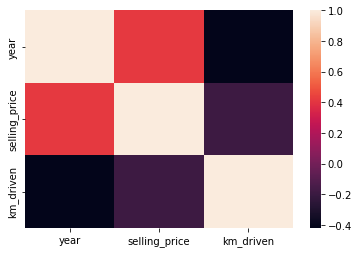

In [15]:
sns.heatmap(df.corr())

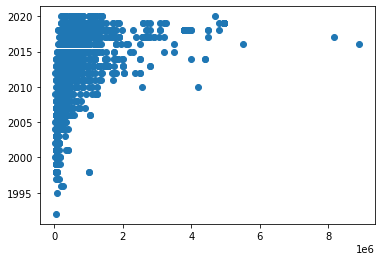

In [16]:
plt.scatter(df['selling_price'],df['year'])

### Performing data preprocessing

In [19]:
df1=df.copy()
df1.head()
df1['name'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
enc_list = ['fuel','seller_type','transmission','owner']
for i in enc_list:
    df1[i] = lb.fit_transform(df1[i])

In [21]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


### Data cleaning

In [22]:
df1['name'] = df['name'].apply(lambda x:" ".join(x.split()[0:2]))

In [23]:
df1.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2007,60000,70000,4,1,1,0
1,Maruti Wagon,2007,135000,50000,4,1,1,0
2,Hyundai Verna,2012,600000,100000,1,1,1,0
3,Datsun RediGO,2017,250000,46000,4,1,1,0
4,Honda Amaze,2014,450000,141000,1,1,1,2


In [24]:
df1.to_csv('cleaned df1.csv')

### Model building

In [25]:
x = df1.drop(columns=['name','selling_price'])
y = df1['selling_price']

In [26]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     4            1             1      0
1     2007      50000     4            1             1      0
2     2012     100000     1            1             1      0
3     2017      46000     4            1             1      0
4     2014     141000     1            1             1      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             1      2
4336  2014      80000     1            1             1      2
4337  2009      83000     4            1             1      2
4338  2016      90000     1            1             1      0
4339  2016      40000     4            1             1      0

[4340 rows x 6 columns]


In [27]:
# spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [28]:
# importing the liberaries
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


In [29]:
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
# prediction on training data
training_df1_prediction = lr.predict(x_train)

In [32]:
error_score = metrics.r2_score(y_train,training_df1_prediction)
print('R squared Error:',error_score)

R squared Error: 0.45808284357848994


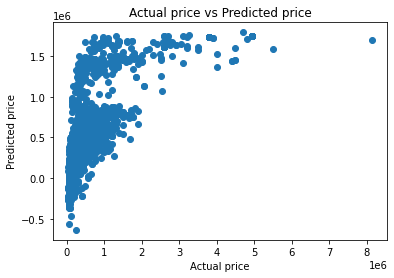

In [34]:
plt.scatter(y_train,training_df1_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()


In [35]:
# prediction on testing data
testing_df1_prediction = lr.predict(x_test)
error_score = metrics.r2_score(y_test,testing_df1_prediction)
print('R squared Error',error_score)

R squared Error 0.4162466077885604


In [36]:
Lass_rm = Lasso()
Lass_rm.fit(x_train,y_train)

Lasso()

In [37]:
training_df1_prediction = Lass_rm.predict(x_train)
error_score = metrics.r2_score(y_train,training_df1_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.4580828435375973


In [38]:
testing_df1_prediction = Lass_rm.predict(x_test)
error_score = metrics.r2_score(y_test,testing_df1_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.416247149469127


In [40]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
testing_df1_prediction = dtr.predict(x_test)
error_score = metrics.r2_score(y_test,testing_df1_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.4143981022132902


In [43]:
training_df1_prediction = dtr.predict(x_train)
error_score = metrics.r2_score(y_train,training_df1_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.9662741835829783


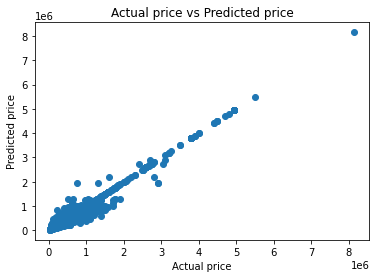

In [44]:
plt.scatter(y_train,training_df1_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
testing_df1_prediction = rfr.predict(x_test)
error_score = metrics.r2_score(y_test,testing_df1_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.5084008324569316


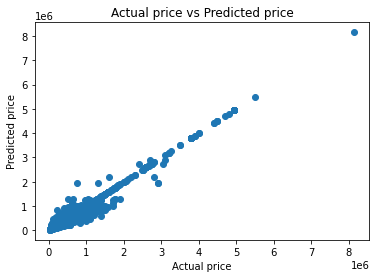

In [48]:
plt.scatter(y_train,training_df1_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

In [49]:
training_df1_prediction = rfr.predict(x_train)
error_score = metrics.r2_score(y_train,training_df1_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.9266699380081812


### Inference:- Based on R squared error decisiontreeregressor performs better as compared to other model.

In [53]:
import pickle as pkl


In [55]:
pkl.dump(df,open('df.pkl','wb'))
pkl.dump(df1,open('df1.pkl','wb'))
pkl.dump(dtr,open('dtr.pkl','wb'))
pkl.dump(rfr,open('rfr.pkl','wb'))
pkl.dump(lr,open('lr.pkl','wb'))